In [75]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
import sklearn.linear_model
from matplotlib import pyplot
from numpy import where
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm
import sklearn.gaussian_process
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [84]:
### LIB TO OPEN EXCEL FILE
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import joblib

In [85]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Importing Original Data after removing unwanted columns

In [86]:
root_dir='/content/gdrive/MyDrive/ResearchProject/'
data_dir = '/content/gdrive/MyDrive/ResearchProject/data/new_data/'
output_dir = root_dir + "classification_results_2023/"
original_data= pd.read_csv(data_dir+"/SB-078_original.csv")


In [87]:
print("Patient's data - Columns")
print(original_data.columns)
print("Patient's data- Class counts")
print(original_data['class'].value_counts())

Patient's data - Columns
Index(['id', 'date', 'age', 'sex', 'BMI', 'income', 'road_dist', 'cooking',
       'am_pef_org', 'y_am_pef', 'tempin', 'humidin', 'pm25in', 'co2in',
       'tempdiffin', 'humidiffin', 'pm25diffin', 'pm10', 'pm25', 'o3', 'no2',
       'co', 'so2', 'temp', 'windsd', 'humid', 'varp', 'dewpt', 'airp', 'seap',
       'solrhr', 'solramnt', 'grdt', 'class'],
      dtype='object')
Patient's data- Class counts
1.0    107
0.0     46
Name: class, dtype: int64


In [88]:
pefr = original_data['y_am_pef']

## Checking for null values

In [89]:
original_data.isnull().sum()

id            0
date          0
age           0
sex           0
BMI           0
income        0
road_dist     0
cooking       0
am_pef_org    0
y_am_pef      0
tempin        0
humidin       0
pm25in        0
co2in         0
tempdiffin    0
humidiffin    0
pm25diffin    0
pm10          0
pm25          0
o3            0
no2           0
co            0
so2           0
temp          0
windsd        0
humid         0
varp          0
dewpt         0
airp          0
seap          0
solrhr        0
solramnt      0
grdt          0
class         0
dtype: int64

In [90]:

drop_attributes = ['id', 'sex', 'age','am_pef_org','BMI']
original_data = original_data.drop(drop_attributes, axis=1)
original_data .sort_values(by='date', ascending=True, inplace=True)
pefr = original_data ['y_am_pef']
original_data  = original_data.drop(['date'], axis=1) #, 'y_am_pef'
display(original_data .head(5), original_data .tail(5))
original_data.keys()

,income,road_dist,cooking,y_am_pef,tempin,humidin,pm25in,co2in,tempdiffin,humidiffin,...,windsd,humid,varp,dewpt,airp,seap,solrhr,solramnt,grdt,class
0,0.143,0.5,1.0,1.000,0.224,0.174,0.330,0.180,0.581,0.211,...,0.499,0.578,0.179,0.467,0.812,0.810,0.450,0.135,0.202,1.0
1,0.143,0.5,1.0,0.875,0.229,0.078,0.344,0.140,0.750,0.408,...,0.349,0.320,0.069,0.268,1.000,1.000,0.682,0.223,0.134,1.0
2,0.143,0.5,1.0,0.875,0.186,0.181,0.286,0.135,0.630,0.062,...,0.276,0.725,0.172,0.462,0.922,0.919,0.264,0.128,0.202,1.0
3,0.143,0.5,1.0,0.875,0.280,0.270,0.463,0.321,0.588,0.332,...,0.166,0.532,0.169,0.465,0.907,0.903,0.704,0.231,0.236,1.0
4,0.143,0.5,1.0,0.875,0.361,0.273,0.325,0.238,0.473,0.161,...,0.377,0.697,0.291,0.607,0.729,0.723,0.433,0.146,0.288,1.0


,income,road_dist,cooking,y_am_pef,tempin,humidin,pm25in,co2in,tempdiffin,humidiffin,...,windsd,humid,varp,dewpt,airp,seap,solrhr,solramnt,grdt,class
148,0.143,0.5,1.0,0.625,0.749,0.863,0.119,0.328,0.000,0.884,...,0.283,0.435,0.837,0.927,0.173,0.162,0.572,0.734,1.000,1.0
149,0.143,0.5,1.0,0.750,0.844,1.000,0.029,0.150,0.175,0.402,...,0.286,0.994,1.000,1.000,0.065,0.061,0.000,0.080,0.869,0.0
150,0.143,0.5,1.0,0.625,0.867,0.984,0.005,0.141,0.214,0.383,...,0.044,1.000,0.943,0.977,0.000,0.000,0.022,0.131,0.859,0.0
151,0.143,0.5,1.0,0.625,0.806,0.799,0.017,0.037,0.313,0.498,...,0.327,0.756,0.612,0.826,0.215,0.214,0.357,0.280,0.740,0.0
152,0.143,0.5,1.0,0.625,0.800,0.636,0.025,0.113,0.180,1.000,...,0.383,0.160,0.411,0.706,0.479,0.467,0.907,1.000,0.863,1.0


Index(['income', 'road_dist', 'cooking', 'y_am_pef', 'tempin', 'humidin',
       'pm25in', 'co2in', 'tempdiffin', 'humidiffin', 'pm25diffin', 'pm10',
       'pm25', 'o3', 'no2', 'co', 'so2', 'temp', 'windsd', 'humid', 'varp',
       'dewpt', 'airp', 'seap', 'solrhr', 'solramnt', 'grdt', 'class'],
      dtype='object')

## Checking Descriptive statistics of the Original data

In [91]:
original_data.describe()

,income,road_dist,cooking,y_am_pef,tempin,humidin,pm25in,co2in,tempdiffin,humidiffin,...,windsd,humid,varp,dewpt,airp,seap,solrhr,solramnt,grdt,class
count,153.000,153.0,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.143,0.5,1.0,0.735882,0.476196,0.340039,0.297542,0.218536,0.523425,0.463791,...,0.327373,0.456993,0.267176,0.511340,0.581647,0.581608,0.534542,0.402562,0.421235,0.699346
std,0.000,0.0,0.0,0.145511,0.236190,0.213509,0.202574,0.161918,0.200029,0.212429,...,0.249474,0.256709,0.209076,0.228396,0.221028,0.221646,0.289089,0.262366,0.248570,0.460048
min,0.143,0.5,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027000,0.000000,0.000000
25%,0.143,0.5,1.0,0.625000,0.277000,0.174000,0.133000,0.126000,0.354000,0.330000,...,0.125000,0.243000,0.096000,0.334000,0.440000,0.437000,0.333000,0.208000,0.225000,0.000000
50%,0.143,0.5,1.0,0.750000,0.513000,0.295000,0.281000,0.185000,0.547000,0.478000,...,0.278000,0.407000,0.223000,0.532000,0.605000,0.600000,0.651000,0.299000,0.372000,1.000000
75%,0.143,0.5,1.0,0.875000,0.660000,0.485000,0.422000,0.274000,0.668000,0.624000,...,0.442000,0.671000,0.394000,0.697000,0.741000,0.743000,0.743000,0.591000,0.643000,1.000000
max,0.143,0.5,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Importing Classification function ( classificationv3.py for splitting the data and also executing classification models)

In [92]:
import importlib.util
import os
spec = importlib.util.spec_from_file_location('classification', root_dir + 'classification/Base_Model/Classificationv3.py')
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)

## Setting Classification Models to use

In [93]:
predictColumn = "class"
minorityVariable = 0 # must be an integer

y = original_data[predictColumn]
class_names = y.unique()
class_names[::-1].sort()
n_classes = len(class_names)
if n_classes > 2 :
    logit_reg_model = sklearn.linear_model.LogisticRegression(solver='saga', multi_class='multinomial')
else :
    logit_reg_model = sklearn.linear_model.LogisticRegression(solver='liblinear', multi_class='auto')

cls = [ "DecisionTree" , sklearn.tree.DecisionTreeClassifier(max_depth=4),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Logit Regression"  , logit_reg_model,
        "Naive Bayes"       , sklearn.gaussian_process.GaussianProcessClassifier()
];

## Method for calling classification algo functions for classifying the data and showing the results

In [94]:
#EVALUATION_METRICS = ['Weighted Accuracy', 'Sensitivity/Recall', 'Precision_avg', 'F1_avg', 'Specificity', 'Precision', 'Precision_class1', 'F1', 'F1_class1']
EVALUATION_METRICS = ["Weighted Accuracy", "Sensitivity/Recall", "Specificity", "Precision_class0", "Precision_class1", "Precision_avg", "F1_class0", "F1_class1", "F1_avg", "auc_roc_score", "False_Discovery_Rate", "False_Negative_Rate", "False_Omission_Rate", "False_Positive_Rate", "Jaccard"]


In [95]:
patient_id="SB-078/"
file_name="SB-078"
#file_name_synthetic="SB-001_synthetic"

In [96]:
def classification_func(file_name, predictCol, minorVar, category_group, cls, output_dir, df_evaluation_results):
    #runtime()

 #   if len(cls)!=2:
  #    print('process one model each time')
   #   return

    print('~~~~~~~~~~~~~~~~~', file_name,'~~~~~~~~~~~~~~~~~~~~~~')

    dataset_dir = Path(output_dir + patient_id+category_group +  "/diagrams/" + file_name + '/') #RESULT_DIR

    # Create Directory for this patient
    if not (dataset_dir.exists() and dataset_dir.is_dir()):
        os.makedirs(dataset_dir)

    print(dataset_dir)

    save_path = output_dir+ patient_id+category_group +'/diagrams/' + file_name + '/sklearn_models_balanced_for_train_'
    print(save_path)

    CLASS_VAR = predictCol
    MINORITY_VAR = minorVar
## change the data attribute in the Classify method below for eg: original_data or synthetic_data
    bestDT = module.Classify(original_data, True, class_var=CLASS_VAR, minority_var=MINORITY_VAR, drawConfusionMatrix=True, classifiers=cls, scale=True, save_path=save_path, after_split=True)

    confusion_matrixes_file = save_path + "confusion_mat_" + category_group + "_"+ file_name
    module.save_confusion_matrix(bestDT[1], confusion_matrixes_file)
    roc_curve_file = save_path + "roc_curve_" + category_group + "_"+ file_name
    module.save_Draw_Roc(bestDT[2], roc_curve_file)
    if len(bestDT[3])!=0:
      featureImportance_path = save_path + "important_mat_" + category_group + "_"+ file_name
      module.save_Draw_FeatureImportanceMatrix(original_data,bestDT[3],cls[0], featureImportance_path, True)

    model_path = save_path + "bestModel_" + category_group + "_"+ file_name + ".joblib"
    joblib.dump(bestDT[4], model_path)
    loaded_model = joblib.load(model_path)
    print(loaded_model)

    df_evaluation_results[file_name] = bestDT[0]
    df_evaluation_results.to_csv(output_dir+patient_id+category_group+"/sklearn_models_balanced_for_train_metrics_"+category_group + ".csv")


In [97]:
%run  '/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py'

In [98]:
%run  '/content/gdrive/MyDrive/ResearchProject/BalancingAlgorithms/Balance.py'

## Decision Tree

~~~~~~~~~~~~~~~~~ SB-078 ~~~~~~~~~~~~~~~~~~~~~~
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/1DecisionTree/diagrams/SB-078
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/1DecisionTree/diagrams/SB-078/sklearn_models_balanced_for_train_
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  150  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  144  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  134  ~~~~~~~~~~
~~~~~~~~~~ DecisionTree ~~~~~~~~~~~~~~~
-----------kfold--------------- 0 ------------
----DecisionTree kfold---------- 0.8333333333333334 DecisionTreeClassifier(max_depth=2)
There is Feature Importance matrix for this classifier: DecisionTreeClassifier(max_depth=2)
cm [[ 8 11]
 [ 0 32]]
cm.ravel() [ 8 11  0 32]


/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:415: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([''] + ['0', '1'], fontsize='xx-large')
/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:416: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels([''] + ['0', '1'], fontsize='xx-large')


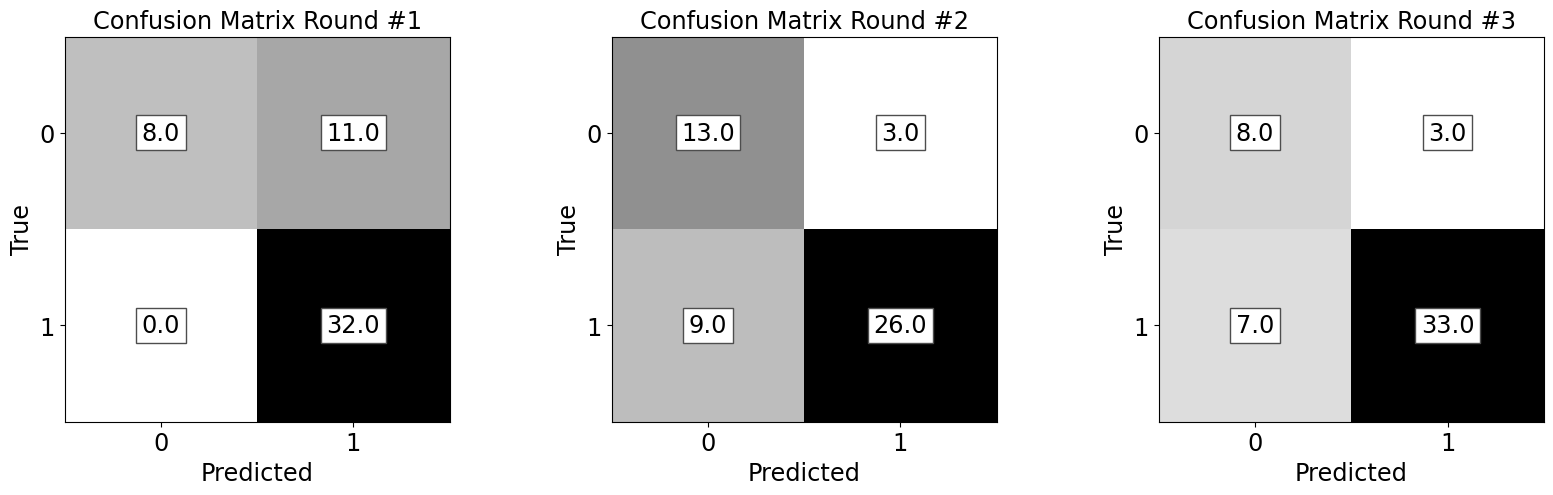

++++++++++++save_confusion_matrix end++++++++++++
(((((((((((((((((((((( draw droc ))))))))))))))))))))))))))))))


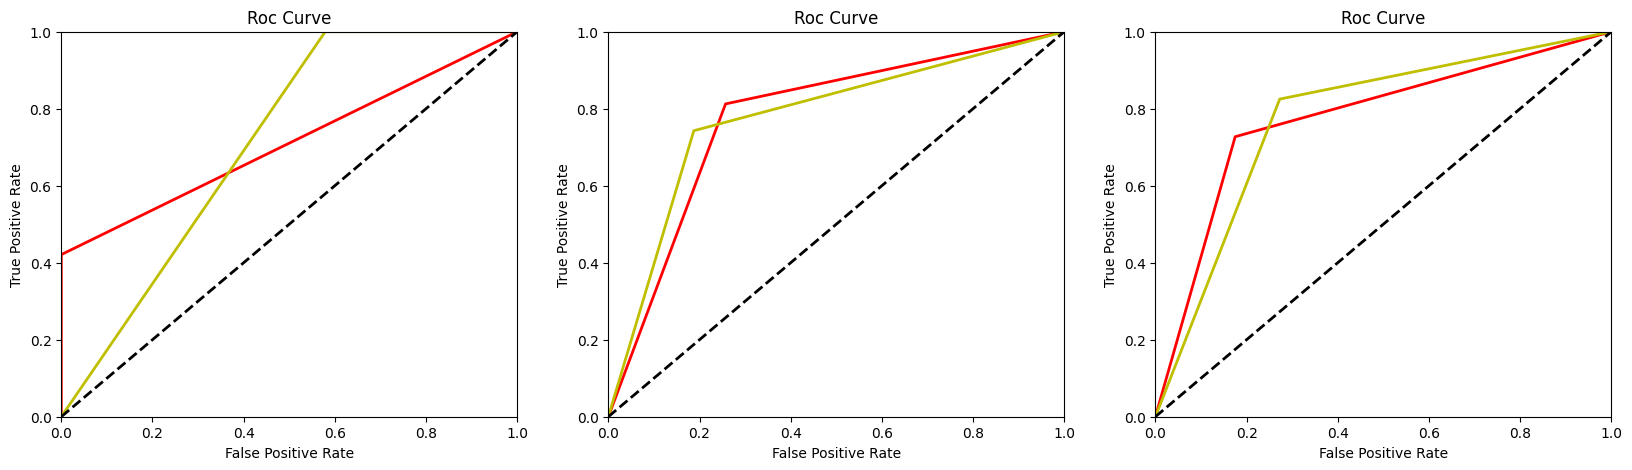

(((((((( draw droc end ))))))))
---------------DrawFeatureImportanceMatrix------------


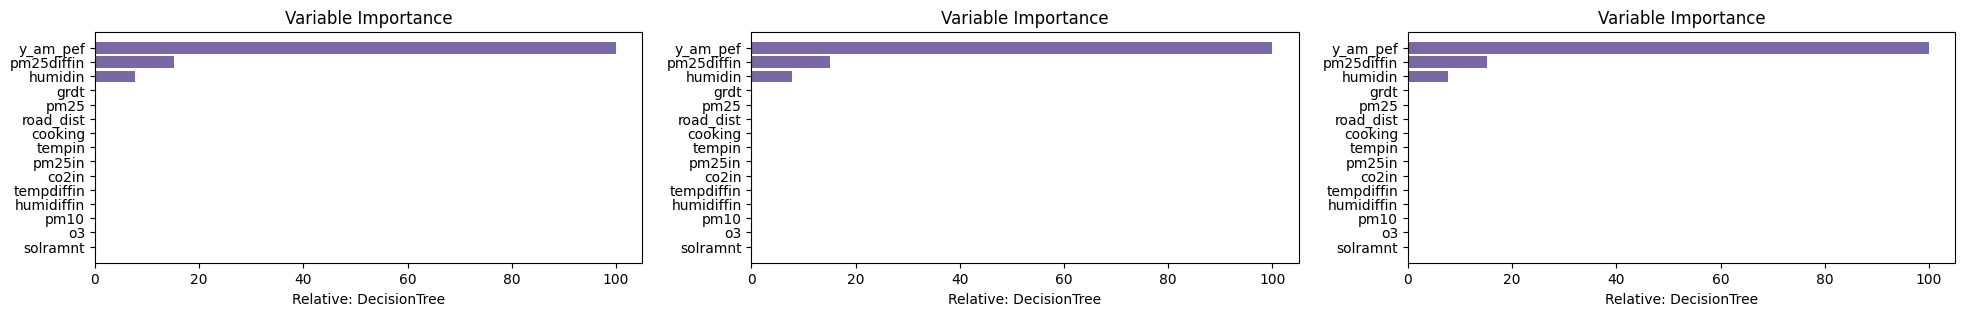

------------DrawFeatureImportanceMatrix end----------------
DecisionTreeClassifier(max_depth=2)


In [99]:
df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)
category_group = '1DecisionTree'
cls = ["DecisionTree", sklearn.tree.DecisionTreeClassifier(max_depth=4)]
classification_func(file_name, predictColumn, minorityVariable, category_group, cls, output_dir, df_evaluation_results)

## K-NN

~~~~~~~~~~~~~~~~~ SB-078 ~~~~~~~~~~~~~~~~~~~~~~
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/2K-NN/diagrams/SB-078
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/2K-NN/diagrams/SB-078/sklearn_models_balanced_for_train_
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  150  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  140  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  138  ~~~~~~~~~~
~~~~~~~~~~ K-NN ~~~~~~~~~~~~~~~
-----------kfold--------------- 0 ------------
---K-NN--- 0.8333333333333334 KNeighborsClassifier(metric='euclidean', n_neighbors=3)
cm [[14  5]
 [ 8 24]]
cm.ravel() [14  5  8 24]
----- [0.74342105 0.73684211 0.75       0.63636364 0.82758621 0.73197492
 0.68292683 0.78688525 0.73490604 0.74342105 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


cm [[ 9  5]
 [ 6 31]]
cm.ravel() [ 9  5  6 31]
----- [0.74034749 0.64285714 0.83783784 0.6        0.86111111 0.73055556
 0.62068966 0.84931507 0.73500236 0.74034749 0.35714286 0.13888889
 0.16216216 0.4        0.45      ] [[ 9  5]
 [ 6 31]]
* 1-----------kfold--------------- 2 ------------


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:415: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([''] + ['0', '1'], fontsize='xx-large')
/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:416: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels([''] + ['0', '1'], fontsize='xx-large')


cm [[11  2]
 [15 23]]
cm.ravel() [11  2 15 23]
----- [0.7257085  0.84615385 0.60526316 0.42307692 0.92       0.67153846
 0.56410256 0.73015873 0.64713065 0.7257085  0.15384615 0.08
 0.39473684 0.57692308 0.39285714] [[11  2]
 [15 23]]
* 2*
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
------run_cv runs successfully------------
++++++++++++save_confusion_matrix++++++++++++


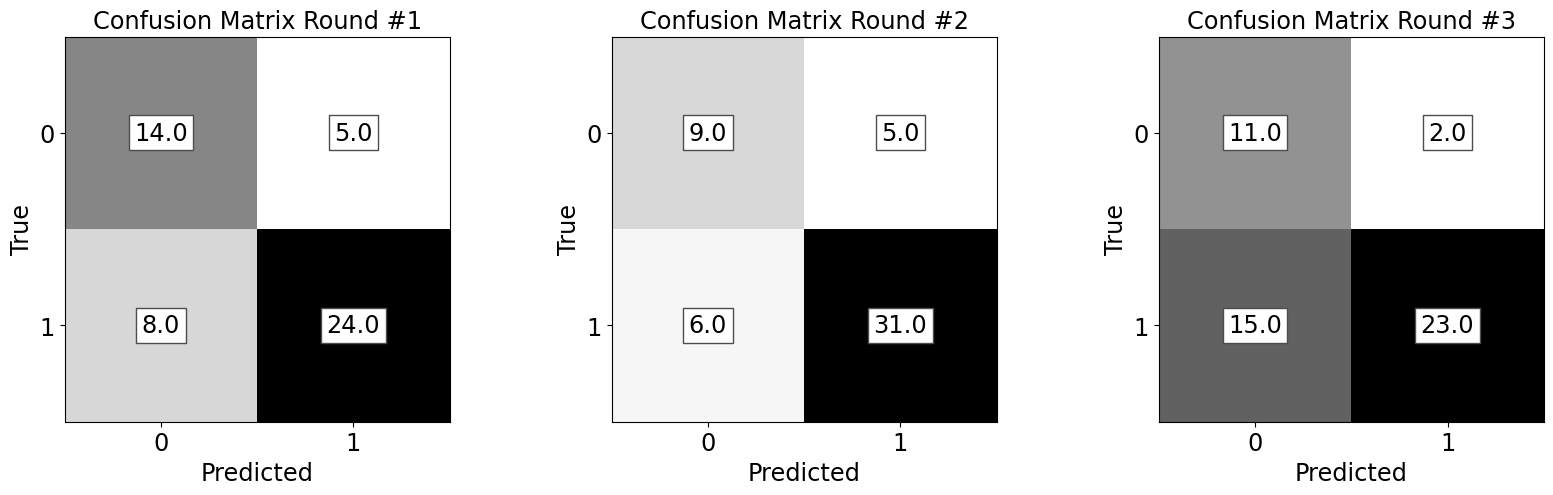

++++++++++++save_confusion_matrix end++++++++++++
(((((((((((((((((((((( draw droc ))))))))))))))))))))))))))))))


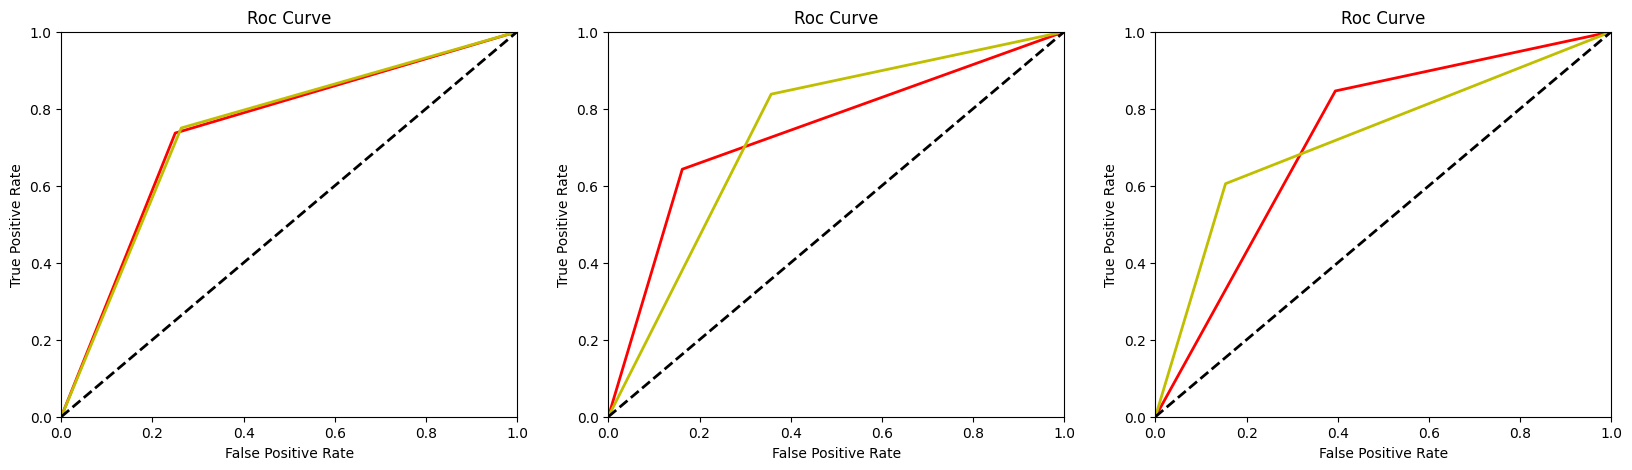

(((((((( draw droc end ))))))))
KNeighborsClassifier(metric='euclidean', n_neighbors=3)


In [100]:
df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)
category_group = '2K-NN'
cls = ["K-NN", sklearn.neighbors.KNeighborsClassifier()]
classification_func(file_name, predictColumn, minorityVariable, category_group, cls, output_dir, df_evaluation_results)

## Logistic Regression

LogisticRegression(solver='liblinear')
~~~~~~~~~~~~~~~~~ SB-078 ~~~~~~~~~~~~~~~~~~~~~~
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/LogisticRegression/diagrams/SB-078
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/LogisticRegression/diagrams/SB-078/sklearn_models_balanced_for_train_
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  148  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  136  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  144  ~~~~~~~~~~
~~~~~~~~~~ Logit Regression ~~~~~~~~~~~~~~~
-----------kfold--------------- 0 ------------


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

---Logit Regression--- 0.7613793103448276 LogisticRegression(C=1, solver='liblinear')
cm [[15  3]
 [ 8 25]]
cm.ravel() [15  3  8 25]
----- [0.79545455 0.83333333 0.75757576 0.65217391 0.89285714 0.77251553
 0.73170732 0.81967213 0.77568972 0.79545455 0.16666667 0.10714286
 0.24242424 0.34782609 0.57692308] [[15  3]
 [ 8 25]]
* 0-----------kfold--------------- 1 ------------


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO.

---Logit Regression--- 0.8301587301587302 LogisticRegression(C=1000, penalty='l1', solver='liblinear')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cm [[ 4  8]
 [ 6 33]]
cm.ravel() [ 4  8  6 33]
----- [0.58974359 0.33333333 0.84615385 0.4        0.80487805 0.60243902
 0.36363636 0.825      0.59431818 0.58974359 0.66666667 0.19512195
 0.15384615 0.6        0.22222222] [[ 4  8]
 [ 6 33]]
* 1-----------kfold--------------- 2 ------------


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

cm [[14  2]
 [15 20]]
cm.ravel() [14  2 15 20]
----- [0.72321429 0.875      0.57142857 0.48275862 0.90909091 0.69592476
 0.62222222 0.70175439 0.6619883  0.72321429 0.125      0.09090909
 0.42857143 0.51724138 0.4516129 ] [[14  2]
 [15 20]]
* 2*
{'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
------run_cv runs successfully------------
++++++++++++save_confusion_matrix++++++++++++


/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:415: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([''] + ['0', '1'], fontsize='xx-large')
/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:416: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels([''] + ['0', '1'], fontsize='xx-large')


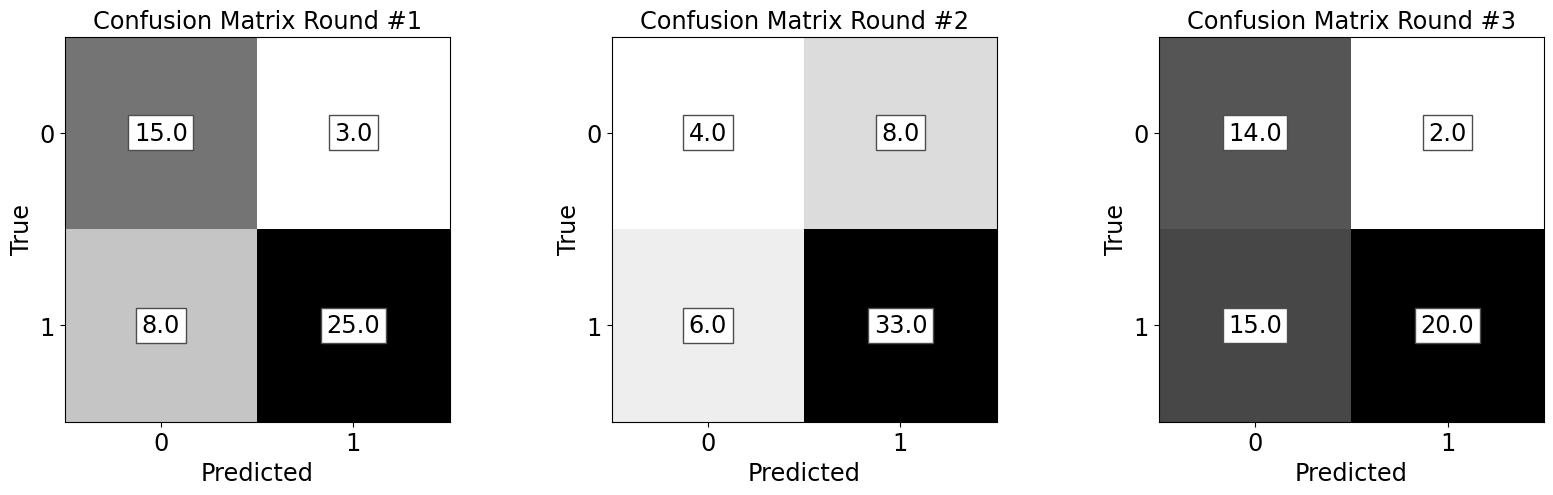

++++++++++++save_confusion_matrix end++++++++++++
(((((((((((((((((((((( draw droc ))))))))))))))))))))))))))))))


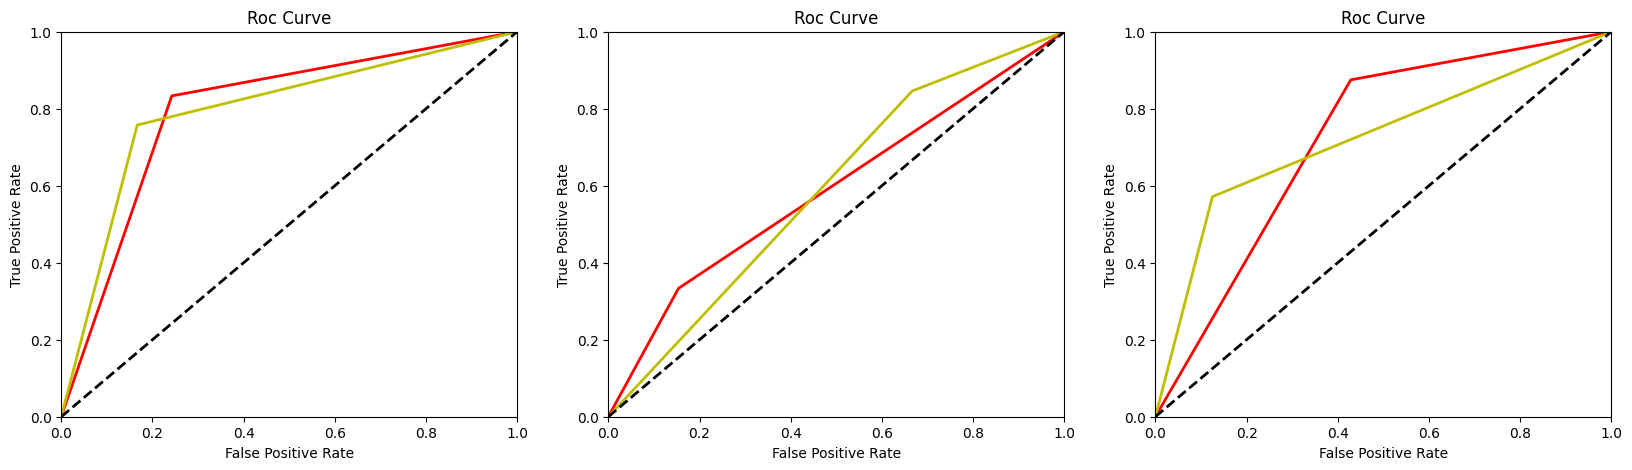

(((((((( draw droc end ))))))))
LogisticRegression(C=1000, penalty='l1', solver='liblinear')


In [101]:
df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)
category_group = 'LogisticRegression'
print(logit_reg_model)
cls = ["Logit Regression", logit_reg_model]
classification_func(file_name, predictColumn, minorityVariable, category_group, cls, output_dir, df_evaluation_results)

## SVM

~~~~~~~~~~~~~~~~~ SB-078 ~~~~~~~~~~~~~~~~~~~~~~
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/SVM/diagrams/SB-078
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/SVM/diagrams/SB-078/sklearn_models_balanced_for_train_
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  142  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  144  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  142  ~~~~~~~~~~
~~~~~~~~~~ SVM ~~~~~~~~~~~~~~~
-----------kfold--------------- 0 ------------
----SVM kfold---------- 0.8714285714285716 SVC(C=1, coef0=0.001, gamma='auto', kernel='sigmoid')
cm [[11  4]
 [18 18]]
cm.ravel() [11  4 18 18]
----- [0.61666667 0.73333333 0.5        0.37931034 0.81818182 0.59874608
 0.5        0.62068966 0.56034483 0.616

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cm [[11  5]
 [ 3 32]]
cm.ravel() [11  5  3 32]
----- [0.80089286 0.6875     0.91428571 0.78571429 0.86486486 0.82528958
 0.73333333 0.88888889 0.81111111 0.80089286 0.3125     0.13513514
 0.08571429 0.21428571 0.57894737] [[11  5]
 [ 3 32]]
* 1-----------kfold--------------- 2 ------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:415: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([''] + ['0', '1'], fontsize='xx-large')
/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:416: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels([''] + ['0', '1'], fontsize='xx-large')


cm [[15  0]
 [14 22]]
cm.ravel() [15  0 14 22]
----- [0.80555556 1.         0.61111111 0.51724138 1.         0.75862069
 0.68181818 0.75862069 0.72021944 0.80555556 0.         0.
 0.38888889 0.48275862 0.51724138] [[15  0]
 [14 22]]
* 2*
{'C': 41, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 2.501, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'sigmoid', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
------run_cv runs successfully------------
++++++++++++save_confusion_matrix++++++++++++


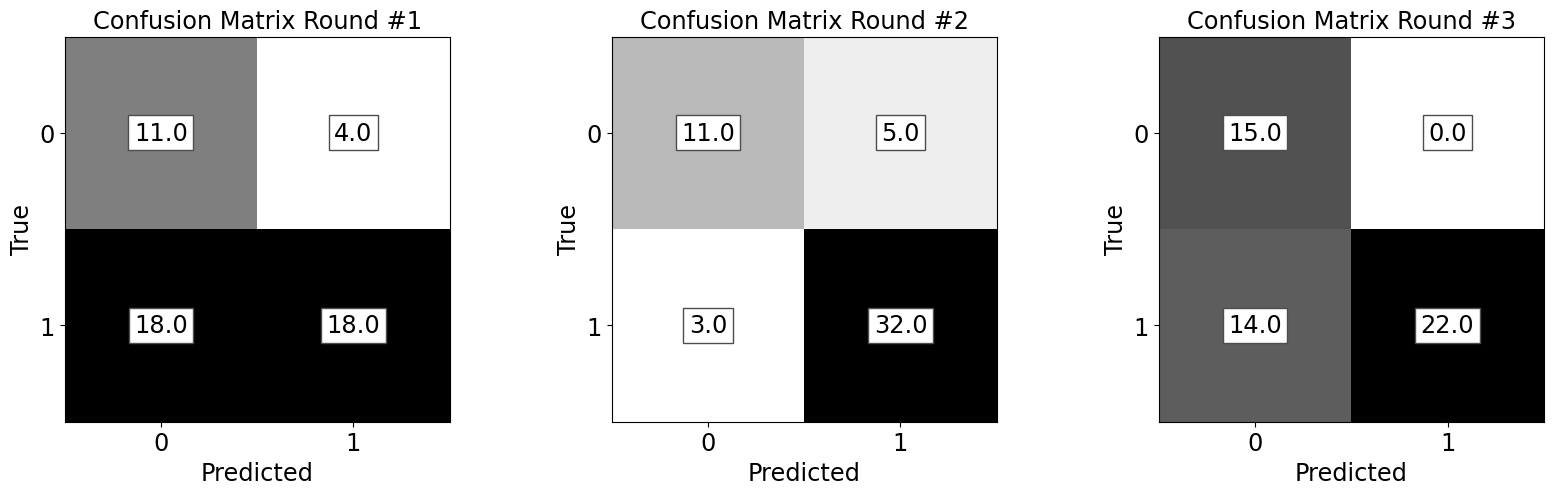

++++++++++++save_confusion_matrix end++++++++++++
(((((((((((((((((((((( draw droc ))))))))))))))))))))))))))))))


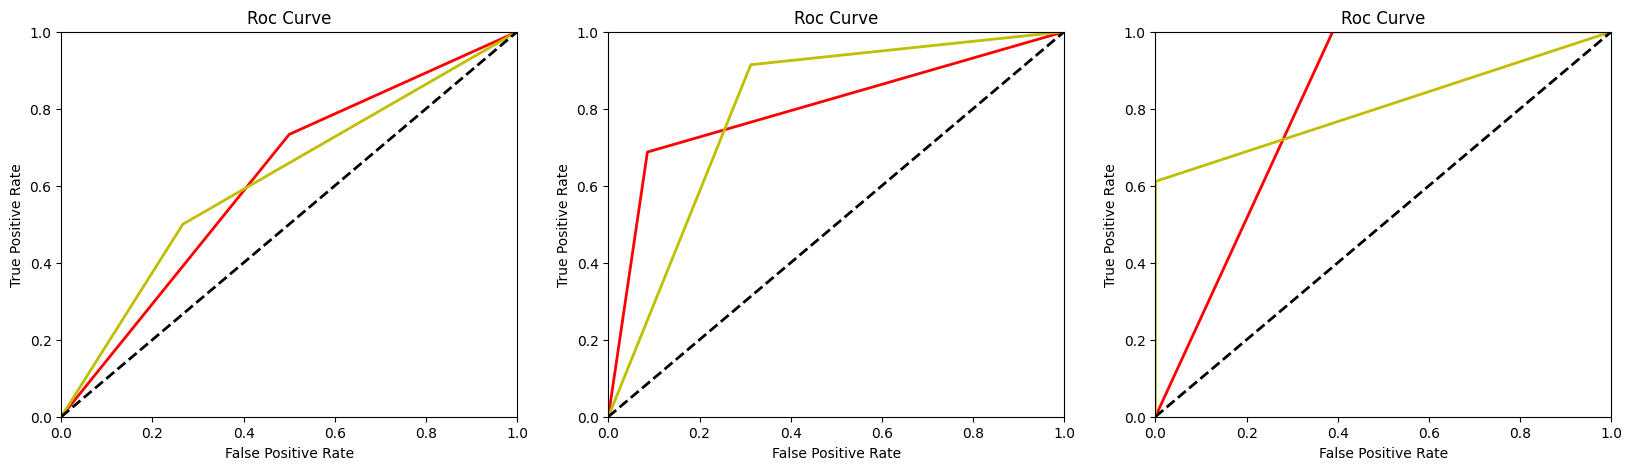

(((((((( draw droc end ))))))))
SVC(C=1, coef0=0.001, gamma='auto', kernel='sigmoid')


In [102]:
df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)
category_group = 'SVM'

cls = ["SVM", sklearn.svm.SVC(kernel="linear")]
classification_func(file_name, predictColumn, minorityVariable, category_group, cls, output_dir, df_evaluation_results)

## Naive Bayes

~~~~~~~~~~~~~~~~~ SB-078 ~~~~~~~~~~~~~~~~~~~~~~
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/NaiveBayes/diagrams/SB-078
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/NaiveBayes/diagrams/SB-078/sklearn_models_balanced_for_train_
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  142  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  144  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  102  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  142  ~~~~~~~~~~
~~~~~~~~~~ Naive Bayes ~~~~~~~~~~~~~~~
-----------kfold--------------- 0 ------------


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning:

---Naive Bayes--- 0.7660098522167489 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)
cm [[13  2]
 [ 8 28]]
cm.ravel() [13  2  8 28]
----- [0.82222222 0.86666667 0.77777778 0.61904762 0.93333333 0.77619048
 0.72222222 0.84848485 0.78535354 0.82222222 0.13333333 0.06666667
 0.22222222 0.38095238 0.56521739] [[13  2]
 [ 8 28]]
* 0-----------kfold--------------- 1 ------------


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning:

---Naive Bayes--- 0.7701970443349755 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cm [[10  6]
 [ 9 26]]
cm.ravel() [10  6  9 26]
----- [0.68392857 0.625      0.74285714 0.52631579 0.8125     0.66940789
 0.57142857 0.7761194  0.67377399 0.68392857 0.375      0.1875
 0.25714286 0.47368421 0.4       ] [[10  6]
 [ 9 26]]
* 1-----------kfold--------------- 2 ------------


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning:

---Naive Bayes--- 0.8083743842364532 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)
cm [[12  3]
 [14 22]]
cm.ravel() [12  3 14 22]
----- [0.70555556 0.8        0.61111111 0.46153846 0.88       0.67076923
 0.58536585 0.72131148 0.65333866 0.70555556 0.2        0.12
 0.38888889 0.53846154 0.4137931 ] [[12  3]
 [14 22]]
* 2*
{'copy_X_train': True, 'kernel__k1': 1**2, 'kernel__k2': RBF(length_scale=1), 'kernel__k1__constant_value': 1.0, 'kernel__k1__constant_value_bounds': 'fixed', 'kernel__k2__length_scale': 1.0, 'kernel__k2__length_scale_bounds': 'fixed', 'kernel': 1**2 * RBF(length_scale=1), 'max_iter_predict': 100, 'multi_class': 'one_vs_rest', 'n_jobs': None, 'n_restarts_optimizer': 0, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 42, 'warm_start': False}
------run_cv runs successfully------------
++++++++++++save_confusion_matrix++++++++++++


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:415: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([''] + ['0', '1'], fontsize='xx-large')
/content/gdrive/MyDrive/ResearchProject/classification/Base_Model/Classificationv3.py:416: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels([''] + ['0', '1'], fontsize='xx-large')


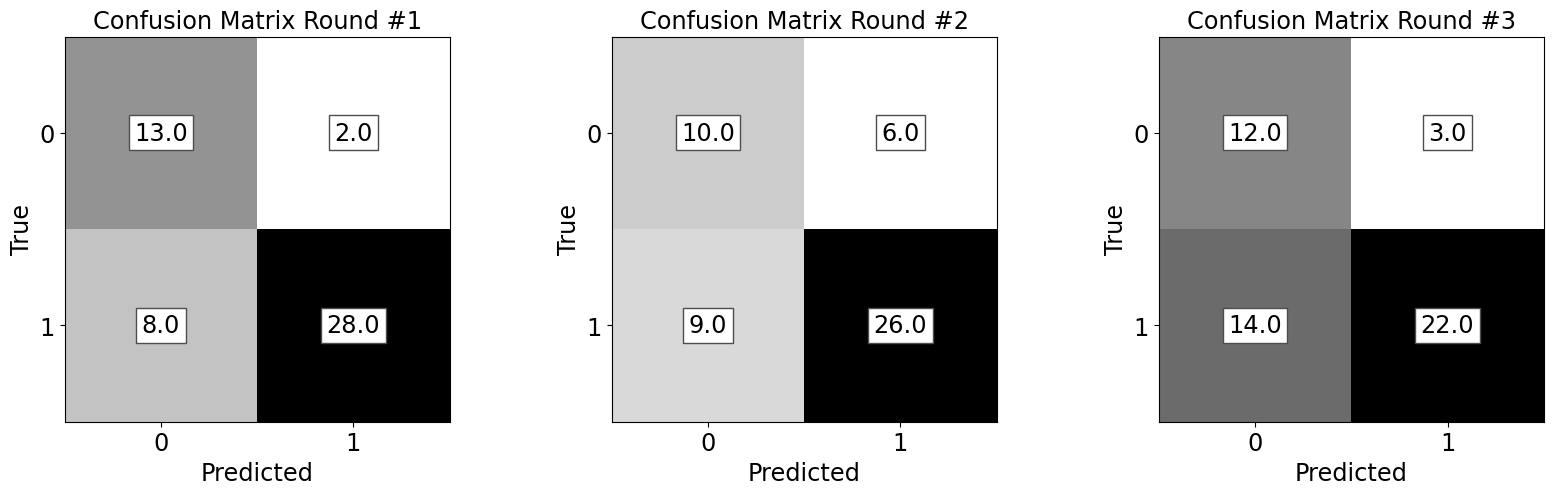

++++++++++++save_confusion_matrix end++++++++++++
(((((((((((((((((((((( draw droc ))))))))))))))))))))))))))))))


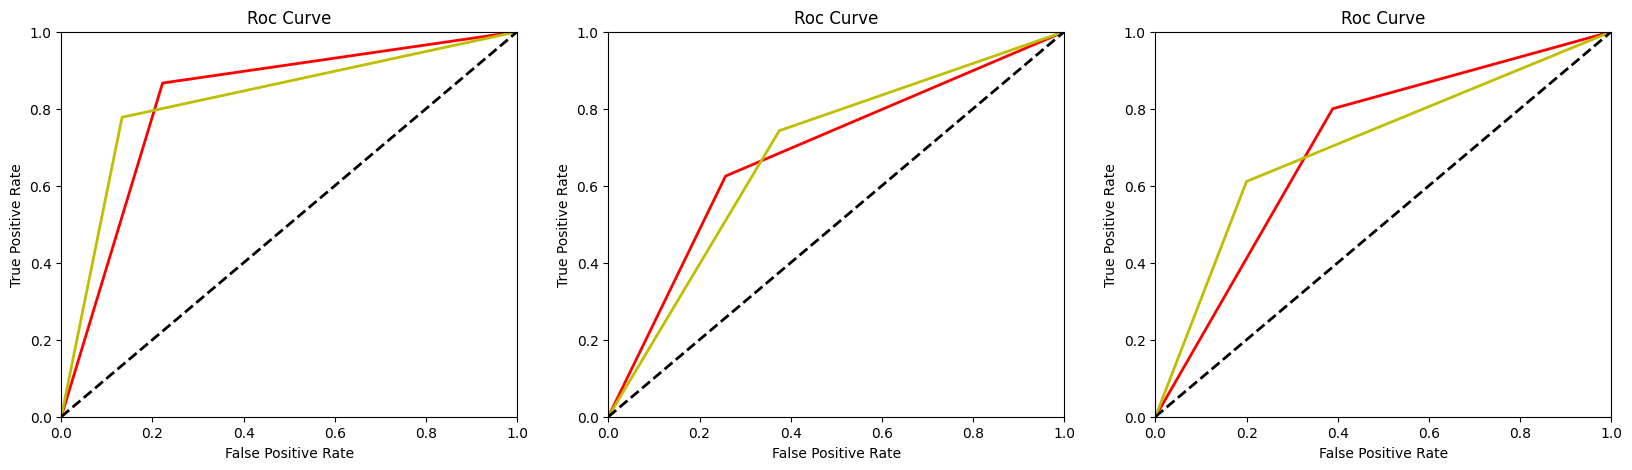

(((((((( draw droc end ))))))))
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)


In [103]:
df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)
category_group = 'NaiveBayes'
cls = ["Naive Bayes", sklearn.gaussian_process.GaussianProcessClassifier()]
classification_func(file_name, predictColumn, minorityVariable, category_group, cls, output_dir, df_evaluation_results)